# Visual Analytics : Assignment 1   
>#### <font color="#2196F3">Meghna Ramachandra Holla (B00812604) </font>
***

In [416]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import regex as re 
# !pip install regex


In [417]:
# Loading data from CSV file
def load_data():
    path_to_file = "C:/Users/Meghna/Documents/MACS/Term 3/Visual Analytics/Assignments/Assignment 1/dataset1_dirty.csv"
    data_set = pd.read_csv(path_to_file)
    return data_set

In [418]:
def age_preprocess(dataset):        
#     print(age.isnull().sum()) #checking total null values
#     print(np.isnan(age).sum()) #checking total nan values
#     print(age.isnull().values.any()) #check if there are any missing values at all
#     print((age.astype(str) != '?').all(axis=0)) #checking if there are '?' characters

    # Historgram for Age distribution before pre-processing, steps = 5
    age_histogram(dataset['age'], "Distribution plot of Age before Pre-processing")
        
    # Preprocessing steps
    #Checking for NaN values and replacing with zero
    if dataset['age'].isnull().sum() != 0 or np.isnan(dataset['age']).sum():
        dataset['age'].fillna(0)
    
    dataset['age'] = dataset['age'].replace(to_replace='?', value=0)
    dataset['age'] = abs(dataset['age'])
    dataset['age'] = dataset['age'].replace(to_replace=0, method='ffill')  
    
    
    # Historgram for Age distribution after pre-processing, steps = 5
#     plt.hist(age_data, bins = 5)
    numeric_histogram(dataset['age'], "Distribution plot of Age after Pre-processing",10)

    return (dataset)


In [419]:
def numeric_histogram(data, dist_title, interval):
    bin_values = np.arange(start=data.min(), stop=data.max(), step=interval)
    data.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True,title=dist_title)
    plt.show()

In [420]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/ ffill bfill backfill


In [421]:
def workclass_preprocess(dataset):
    workclass_histogram(pd.DataFrame(dataset['workclass']), "Distribution plot of Workclass before Pre-processing")

    dataset = pd.DataFrame(dataset) 
    dataset['workclass'] = dataset['workclass'].replace(to_replace=r"[- ]", value='',regex=True)
    dataset['workclass'] = dataset['workclass'].replace(to_replace=r"^(p|P)riv...", value='Private',regex=True)
    dataset['workclass'] = dataset['workclass'].replace(to_replace=r"^(f|F)e........", value='Federal-gov',regex=True)
    dataset['workclass'] = dataset['workclass'].replace(to_replace=r"^(s|S)elfempn?ot?..+", value='Self-emp-not-inc',regex=True)
    dataset['workclass'] = dataset['workclass'].replace(to_replace=r"^(s|S)elfempi?.c", value='Self-emp-inc',regex=True)
    dataset['workclass'] = dataset['workclass'].replace(to_replace=r"^(l|L)o......", value='Local-gov',regex=True)
    dataset['workclass'] = dataset['workclass'].replace(to_replace=r"^(S|s)t......", value='State-gov',regex=True)
    dataset['workclass'] = dataset['workclass'].replace(to_replace=r"^(W|w)ithoutpay", value='Without-pay',regex=True)
    
    dataset['workclass'] = workclass_histogram(pd.DataFrame(dataset['workclass']), "Distribution plot of Workclass after Pre-processing")#mode because 'Private' workclass is the most frequent(exponentially), therefore this will not affect the distribution

    return(dataset)

In [422]:
def workclass_histogram(workclass, dist_title):
    workclass = workclass.replace(to_replace="?",value=workclass.mode())
    workclass.groupby(workclass.columns[0])[workclass.columns[-1]].count().plot(kind='bar',figsize=[16,6]).set_title(dist_title,fontsize=30)#[12]
    plt.ylabel('Location')
    plt.xlabel('Number of restaurants')
    plt.show()
    return(workclass)

In [423]:
def fnlwgt_preprocess(dataset):
#     print(dataset['fnlwgt'].isnull().sum()) #checking total null values
#     print(np.isnan(dataset['fnlwgt']).sum()) #checking total nan values
#     print((dataset['fnlwgt'].astype(str) != '?').all(axis=0)) #checking if there are '?' characters
#     print(dataset['workclass'].is_unique)
    numeric_histogram(dataset['fnlwgt'], "Distribution plot of FnlWgt before Pre-processing", 10000)
    

In [424]:
def main():
    data_set = load_data()
#     print(data_set.apply(axis=0, func=lambda x : any(pd.isnull(x)))) #checking if there are null values in all columns
    clean_age = age_preprocess(data_set)
    clean_workclass = workclass_preprocess(clean_age)
    clean_fnlwgt = fnlwgt_preprocess(clean_workclass)

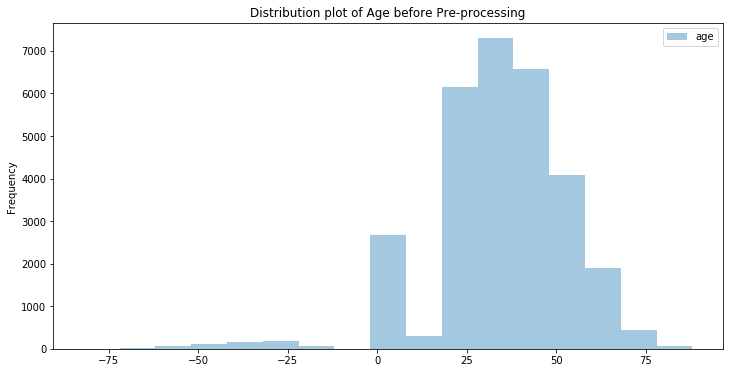

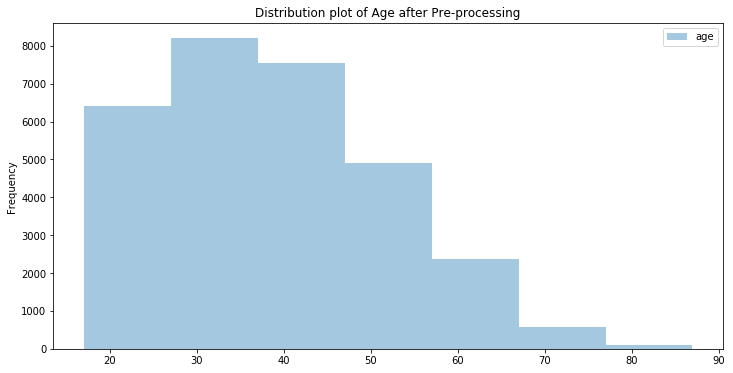

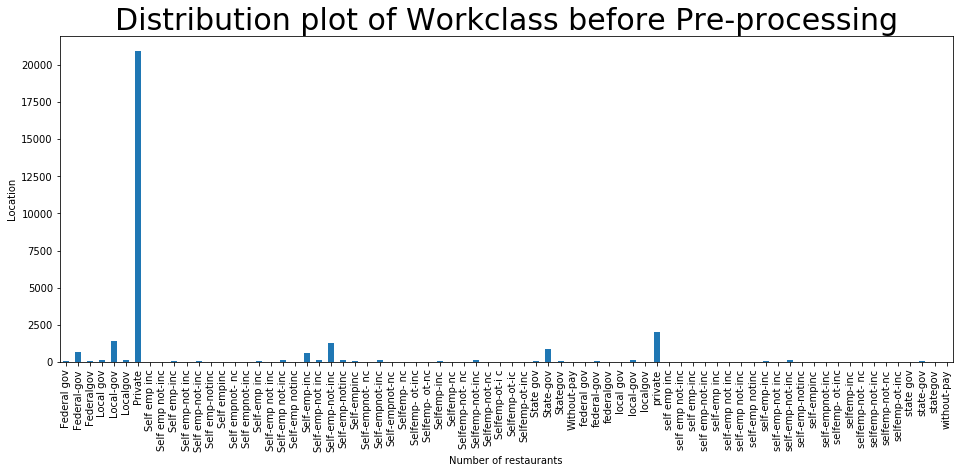

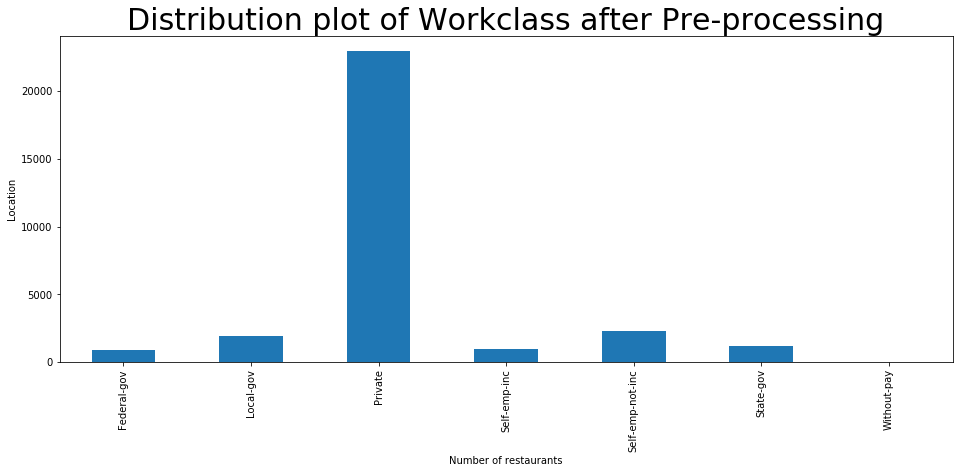

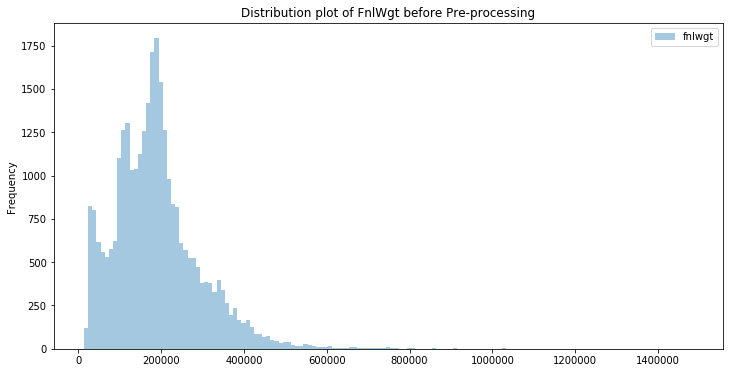

In [425]:
if __name__ == "__main__":
    main()